## Generating Presentation Figures
This notebook is specifically for generating figures to populate the github repository and EDA powerpoint presentation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
GameData = pd.read_csv('./FinalSteamData.csv')
GameData.columns

Index(['Unnamed: 0', 'type', 'name', 'required_age', 'is_free',
       'detailed_description', 'short_description', 'Review Score',
       'Review Score Description', 'Top Reviews by Upvotes', 'appid',
       'positive', 'negative', 'owners', 'price', 'initialprice', 'discount',
       'metacritic', 'Single-player', 'Steam Achievements', 'Steam Workshop',
       'Steam Cloud', 'Includes level editor', 'Downloadable Content',
       'Multi-player', 'Shared/Split Screen', 'Full controller support',
       'Steam Trading Cards', 'Remote Play Together',
       'Partial Controller Support', 'Steam Leaderboards',
       'Captions available', 'Stats', 'PvP', 'Online PvP', 'Co-op',
       'Online Co-op', 'MMO', 'In-App Purchases', 'Shared/Split Screen PvP',
       'Shared/Split Screen Co-op', 'Cross-Platform Multiplayer', 'LAN PvP',
       'LAN Co-op', 'Valve Anti-Cheat enabled', 'Remote Play on TV',
       'VR Support', 'Remote Play on Phone', 'Remote Play on Tablet', 'Action',
       'Casual

In [3]:
#Data Frequency by Year

Year_Freq = pd.DataFrame(GameData['Release Year'].value_counts()).reset_index()
Year_Freq = Year_Freq.rename(columns = {'index': 'Release Year', 'Release Year': 'Game Count'})
Year_Freq = Year_Freq.sort_values('Release Year')
# Year_Freq

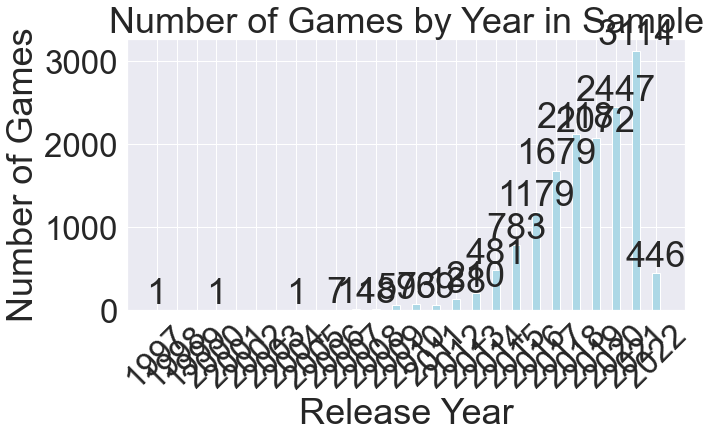

In [71]:
fig = plt.figure(figsize = (10, 5))
Years = Year_Freq['Release Year']
Counts = Year_Freq['Game Count']
# creating the bar plothttp://localhost:8892/notebooks/Data_606/3.1.%20Generating%20Presentation%20Figures.ipynb#
plt.bar(Years, Counts, color ='lightblue',
        width = 0.4)
x = np.arange(1997,2023,1)
plt.xticks(ticks =x, labels = x, rotation = 45)

for i in range(len(Counts)):
    plt.annotate(str(Counts[i]), xy=(Years[i],Counts[i]), ha='center', va='bottom')
plt.xlabel("Release Year")
plt.ylabel("Number of Games")
plt.title("Number of Games by Year in Sample")
plt.savefig("SampledGamesbyYear.png", bbox_inches="tight")

In [50]:
#Bar graph of Category Frequencies

Genres = ['Action', 'Casual',
       'Indie', 'Simulation', 'Strategy', 'Early Access', 'Racing', 'RPG',
       'Adventure', 'Education', 'Game Development', 'Massively Multiplayer',
       'Design & Illustration', 'Web Publishing', 'Violent',
       'Gore', 'Sports', 'Animation & Modeling', 'Audio Production',
       'Software Training', 'Utilities', 'Video Production', 'Photo Editing',
       ]

Freq = {}
for item in Genres:
    Freq.update({item:GameData[item].sum()})
    
Gen_Freq = pd.DataFrame.from_dict(Freq, orient = 'index').reset_index()
Gen_Freq = Gen_Freq.rename(columns = {'index': 'Genre', 0: 'Game Count'})
Gen_Freq = Gen_Freq.sort_values('Game Count', ascending=False).reset_index()
Gen_Freq = Gen_Freq[0:10]
Gen_Freq = Gen_Freq.sort_values('Game Count')

<Figure size 1440x720 with 0 Axes>

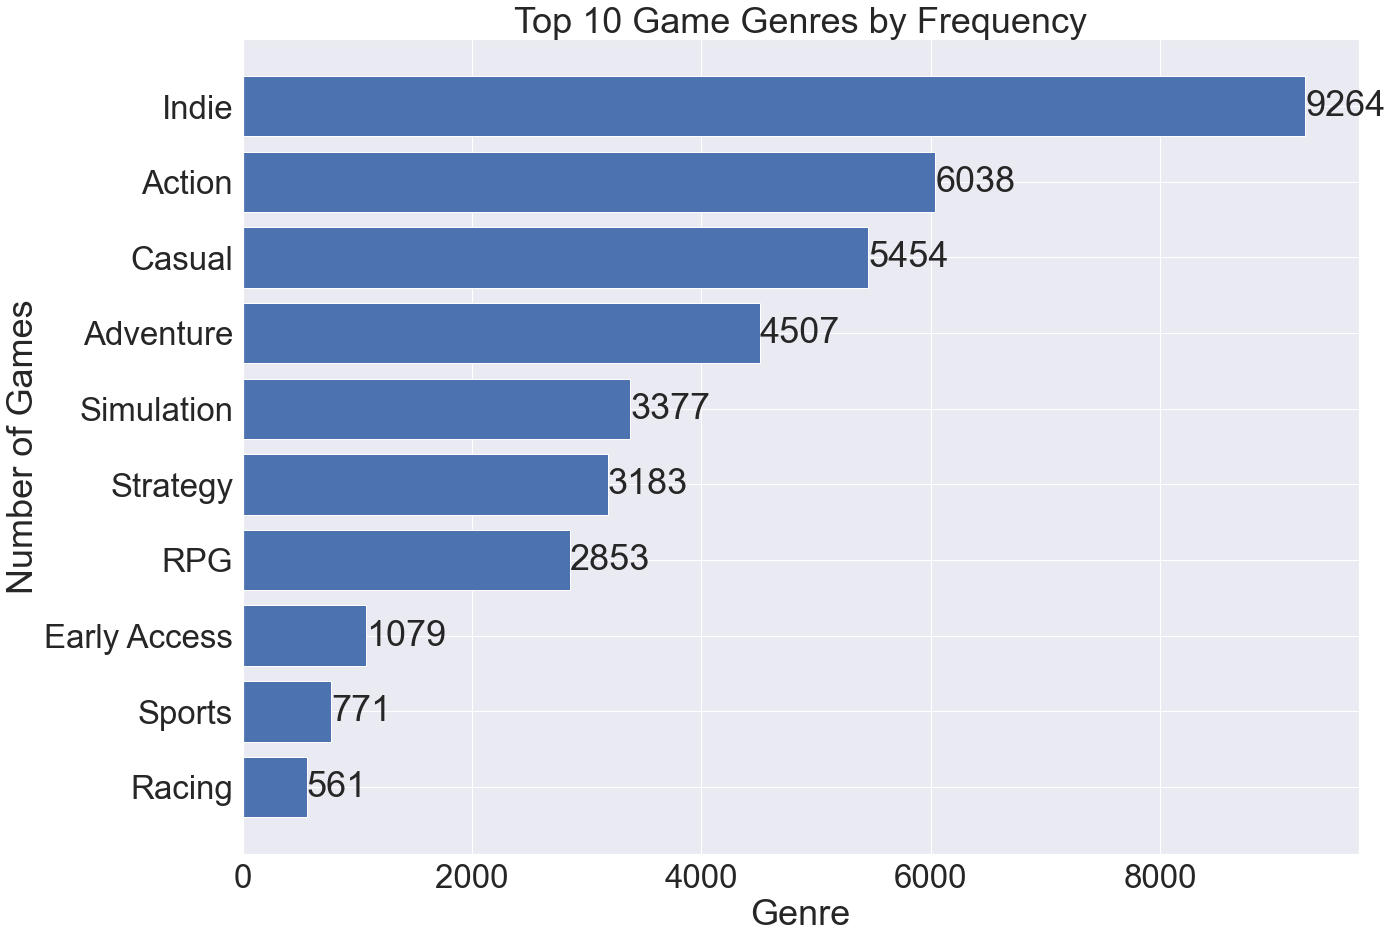

In [51]:
fig = plt.figure(figsize = (20, 10))
Genre = Gen_Freq['Genre']
Counts = Gen_Freq['Game Count']
# creating the Horizontal bar plot

fig, ax = plt.subplots()
y_pos = np.arange(len(Genre))
 
hbars = ax.barh(y_pos, Counts, align='center')
plt.yticks(y_pos, Genre)
plt.xlabel("Genre")
plt.ylabel("Number of Games")
plt.title("Top 10 Game Genres by Frequency")
# Label with specially formatted floats
ax.bar_label(hbars)

plt.savefig("SampledGamesbyGenre.png", bbox_inches="tight")

In [52]:
# Game Category frequencies

Categories = ['Single-player', 'Steam Achievements', 'Steam Workshop',
       'Steam Cloud', 'Includes level editor', 'Downloadable Content',
       'Multi-player', 'Shared/Split Screen', 'Full controller support',
       'Steam Trading Cards', 'Remote Play Together',
       'Partial Controller Support', 'Steam Leaderboards',
       'Captions available', 'Stats', 'PvP', 'Online PvP', 'Co-op',
       'Online Co-op', 'MMO', 'In-App Purchases', 'Shared/Split Screen PvP',
       'Shared/Split Screen Co-op', 'Cross-Platform Multiplayer', 'LAN PvP',
       'LAN Co-op', 'Valve Anti-Cheat enabled', 'Remote Play on TV',
       'VR Support', 'Remote Play on Phone', 'Remote Play on Tablet']

Freq = {}
for cat in Categories:
    Freq.update({cat:GameData[cat].sum()})
    
Cat_Freq = pd.DataFrame.from_dict(Freq, orient = 'index').reset_index()
Cat_Freq = Cat_Freq.rename(columns = {'index': 'Category', 0: 'Game Count'})
Cat_Freq = Cat_Freq.sort_values('Game Count', ascending=False).reset_index()
Cat_Freq = Cat_Freq[0:10]
Cat_Freq = Cat_Freq.sort_values('Game Count')

<Figure size 1440x720 with 0 Axes>

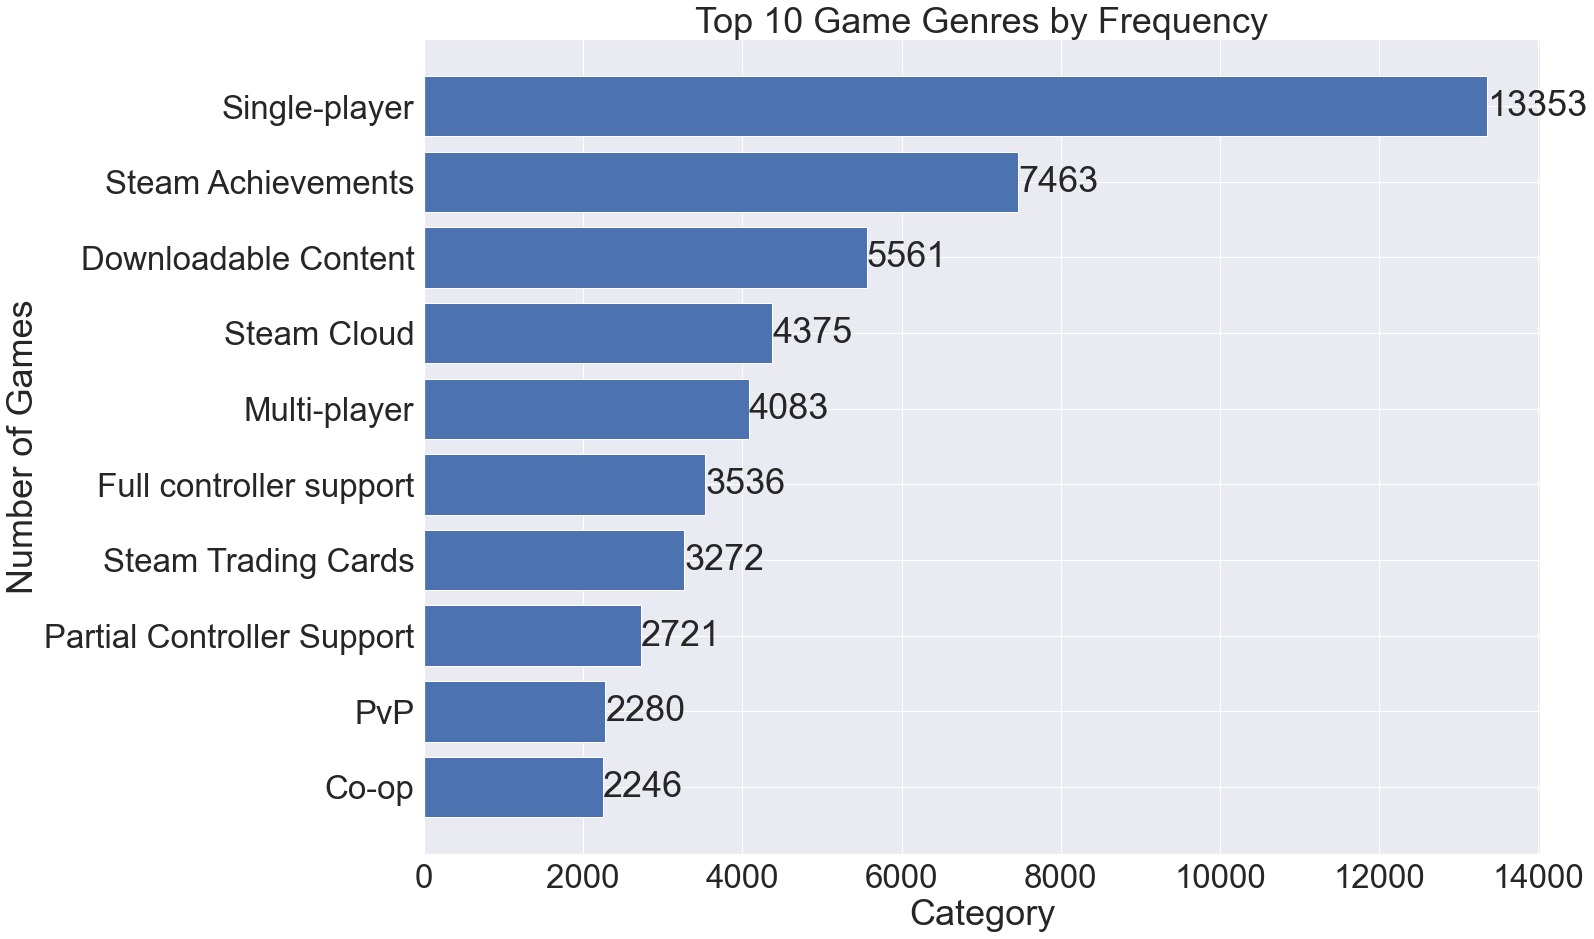

In [53]:
fig = plt.figure(figsize = (20, 10))
Category = Cat_Freq['Category']
Counts = Cat_Freq['Game Count']
# creating the Horizontal bar plot

fig, ax = plt.subplots()
y_pos = np.arange(len(Category))
 
hbars = ax.barh(y_pos, Counts, align='center')
plt.yticks(y_pos, Category)
plt.xlabel("Category")
plt.ylabel("Number of Games")
plt.title("Top 10 Game Genres by Frequency")
# Label with specially formatted floats
ax.bar_label(hbars)

plt.savefig("SampledGamesbyCategory.png", bbox_inches="tight")

C:\Users\15856\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


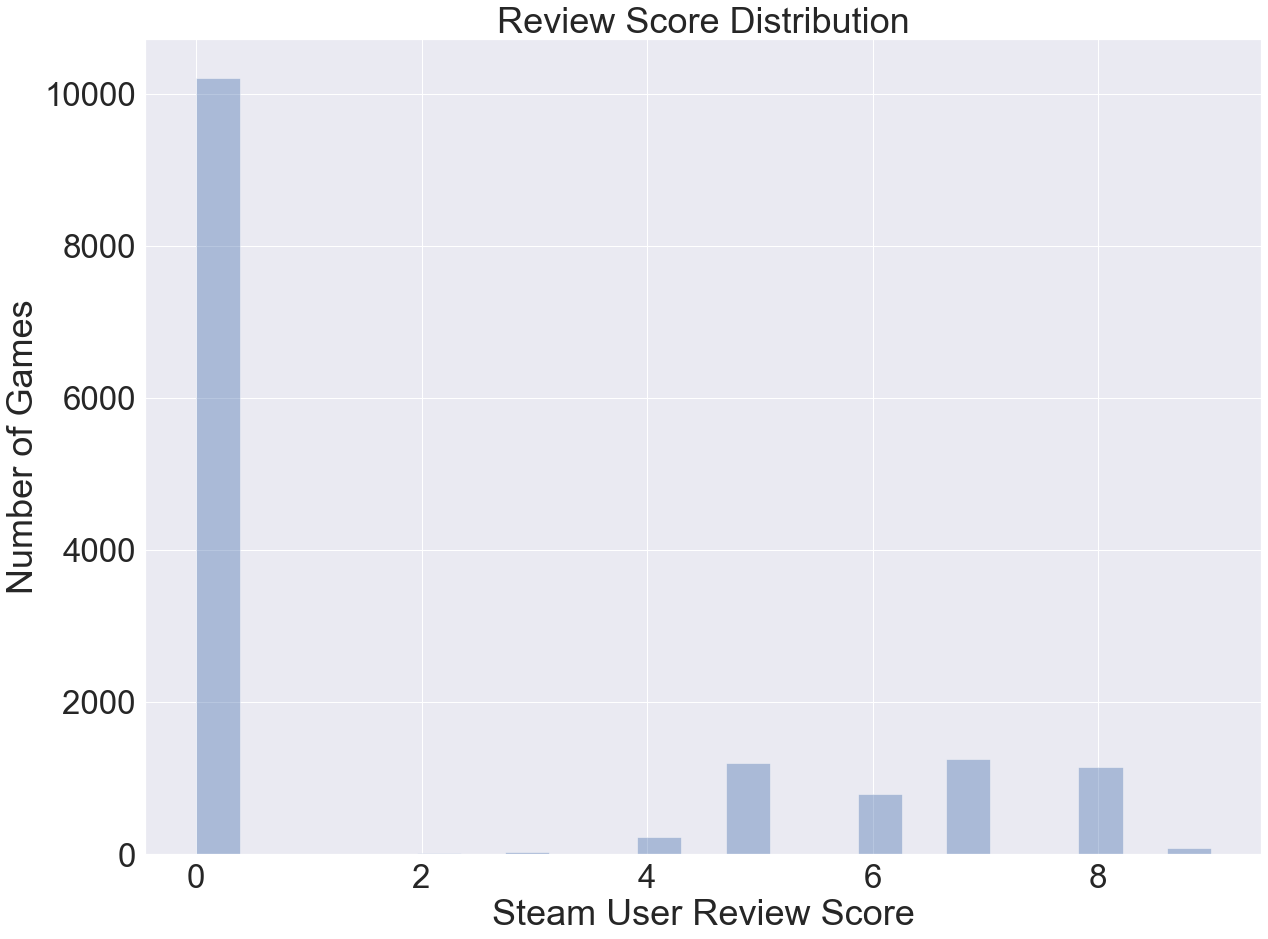

In [72]:
# Review Score Histogram

fig, ax = plt.subplots()
sns.distplot(a=GameData['Review Score'], hist=True, kde=False, rug=False )
plt.xlabel("Steam User Review Score")
plt.ylabel("Number of Games")
plt.title("Review Score Distribution")
plt.savefig("ReviewScoreDistribution.png", bbox_inches="tight")

In [55]:
#Game Owners Histogram

GameData['owners'].value_counts()
Owner_Freq = pd.DataFrame(GameData['owners'].value_counts()).reset_index()
Owner_Freq = Owner_Freq.rename(columns = {'index': 'Number of Owners', 'owners': 'Number of Games'})
# Owner_Freq

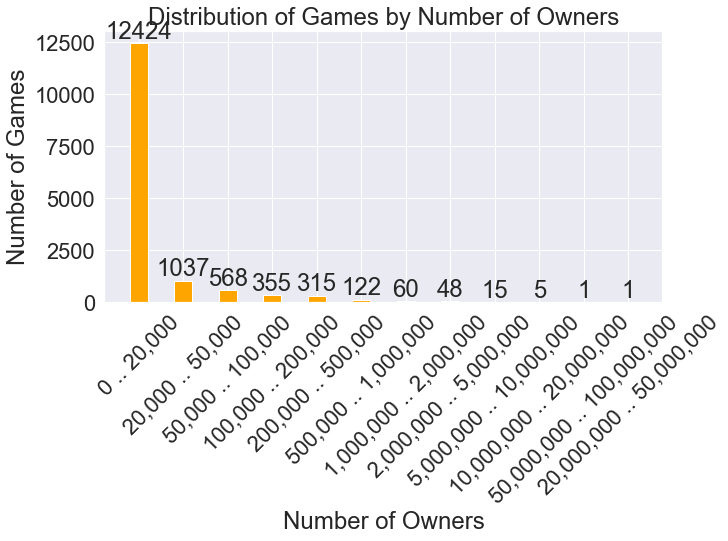

In [74]:
fig = plt.figure(figsize = (10, 5))
Owners = Owner_Freq['Number of Owners']
Counts = Owner_Freq['Number of Games']
# creating the bar plot
plt.bar(Owners, Counts, color ='orange',
        width = 0.4)
plt.xticks(rotation = 45)
for i in range(len(Counts)):
    plt.annotate(str(Counts[i]), xy=(Owners[i],Counts[i]), ha='center', va='bottom')
plt.xlabel("Number of Owners")
plt.ylabel("Number of Games")
plt.title("Distribution of Games by Number of Owners")
plt.savefig("Owner Distribution.png", bbox_inches="tight")

In [57]:
# Year by Genre Crosstab
Genres.append('Release Year')
YearGameXTab = GameData[Genres]

YearGameXTab.groupby(by = 'Release Year').sum()

,Action,Casual,Indie,Simulation,Strategy,Early Access,Racing,RPG,Adventure,Education,Game Development,Massively Multiplayer,Design & Illustration,Web Publishing,Violent,Gore,Sports,Animation & Modeling,Audio Production,Software Training,Utilities,Video Production,Photo Editing
Release Year,,,,,,,,,,,,,,,,,,,,,,,
1997.0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2004.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2006.0,1,4,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2007.0,8,0,2,0,3,0,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2008.0,9,4,4,2,5,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2009.0,15,10,9,7,22,0,1,7,17,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2010.0,36,12,18,11,13,0,0,14,9,0,0,3,0,0,0,0,0,0,0,0,0,0,0
2011.0,31,2,14,13,24,0,2,11,12,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [58]:
#Graph the change in genre type over time
YearGameXTab = YearGameXTab.groupby(by = 'Release Year').sum()
#Find the percent of each genre for each year:
YearGameXTab_Perc = YearGameXTab.div(YearGameXTab.sum(axis=1), axis=0).reset_index()
YearGameXTab_Perc

,Release Year,Action,Casual,Indie,Simulation,Strategy,Early Access,Racing,RPG,Adventure,Education,Game Development,Massively Multiplayer,Design & Illustration,Web Publishing,Violent,Gore,Sports,Animation & Modeling,Audio Production,Software Training,Utilities,Video Production,Photo Editing
0,1997.0,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2000.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2004.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2006.0,0.142857,0.571429,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2007.0,0.444444,0.000000,0.111111,0.000000,0.166667,0.000000,0.055556,0.166667,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2008.0,0.333333,0.148148,0.148148,0.074074,0.185185,0.000000,0.000000,0.037037,0.074074,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,2009.0,0.168539,0.112360,0.101124,0.078652,0.247191,0.000000,0.011236,0.078652,0.191011,0.000000,0.000000,0.011236,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,2010.0,0.310345,0.103448,0.155172,0.094828,0.112069,0.000000,0.000000,0.120690,0.077586,0.000000,0.000000,0.025862,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,2011.0,0.279279,0.018018,0.126126,0.117117,0.216216,0.000000,0.018018,0.099099,0.108108,0.000000,0.000000,0.009009,0.000000,0.000000,0.000000,0.000000,0.009009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,2012.0,0.268908,0.100840,0.159664,0.105042,0.155462,0.000000,0.029412,0.071429,0.084034,0.000000,0.000000,0.008403,0.000000,0.000000,0.004202,0.004202,0.008403,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [59]:
YearGameXTab_Perc = YearGameXTab_Perc.melt(id_vars = ['Release Year'], value_vars = ['Indie', 'Action', 'Casual', 'Adventure', 'Simulation', 'Strategy','RPG', 'Early Access', 'Sports', 'Racing'], value_name='Percent of Total Games')
YearGameXTab_Perc = YearGameXTab_Perc.rename(columns = {'variable':'Genre'})

In [73]:
# plot
#Genre = ['Indie', 'Action', 'Casual', 'Adventure', 'Simulation', 'Strategy','RPG', 'Early Access', 'Sports', 'Racing']
sns.set(rc = {'figure.figsize':(20,15)}, font_scale =2)
custom_palette = sns.color_palette("Paired", 10)
fig = sns.lineplot(data=YearGameXTab_Perc, x='Release Year', y='Percent of Total Games',style ='Genre', hue='Genre', linewidth = 3, palette = custom_palette).set(title='Change in Top 10 Genres over Time')
x = np.arange(1997,2023,1)
plt.xticks(ticks =x, labels = x, rotation = 45)
# show the graph

plt.savefig("Change in Top 10 Genres over Time.png", bbox_inches="tight")
plt.show()

ValueError: Could not interpret value `Genre` for parameter `hue`

In [64]:
# Year by Category Crosstab
Categories.append('Release Year')
YearGameXTab = GameData[Categories]

#Graph the change in Category type over time
YearGameXTab = YearGameXTab.groupby(by = 'Release Year').sum()
#Find the percent of each Category for each year:
YearGameXTab_Perc = YearGameXTab.div(YearGameXTab.sum(axis=1), axis=0).reset_index()
YearGameXTab_Perc.columns

Index(['Release Year', 'Single-player', 'Steam Achievements', 'Steam Workshop',
       'Steam Cloud', 'Includes level editor', 'Downloadable Content',
       'Multi-player', 'Shared/Split Screen', 'Full controller support',
       'Steam Trading Cards', 'Remote Play Together',
       'Partial Controller Support', 'Steam Leaderboards',
       'Captions available', 'Stats', 'PvP', 'Online PvP', 'Co-op',
       'Online Co-op', 'MMO', 'In-App Purchases', 'Shared/Split Screen PvP',
       'Shared/Split Screen Co-op', 'Cross-Platform Multiplayer', 'LAN PvP',
       'LAN Co-op', 'Valve Anti-Cheat enabled', 'Remote Play on TV',
       'VR Support', 'Remote Play on Phone', 'Remote Play on Tablet'],
      dtype='object')

In [65]:
YearGameXTab_Perc = YearGameXTab_Perc.melt(id_vars = ['Release Year'], value_vars = ['Single-player', 'Steam Achievements', 
       'Steam Cloud', 'Downloadable Content',
       'Multi-player', 'Full controller support',
       'Steam Trading Cards', 
       'Partial Controller Support', 'PvP', 'Co-op'
       ], var_name='Category', value_name='Percent of Total Games')
YearGameXTab_Perc

,Release Year,Category,Percent of Total Games
0,1997.0,Single-player,0.333333
1,2000.0,Single-player,0.000000
2,2004.0,Single-player,0.333333
3,2006.0,Single-player,0.700000
4,2007.0,Single-player,0.311111
...,...,...,...
195,2018.0,Co-op,0.033971
196,2019.0,Co-op,0.037069
197,2020.0,Co-op,0.033449
198,2021.0,Co-op,0.033845


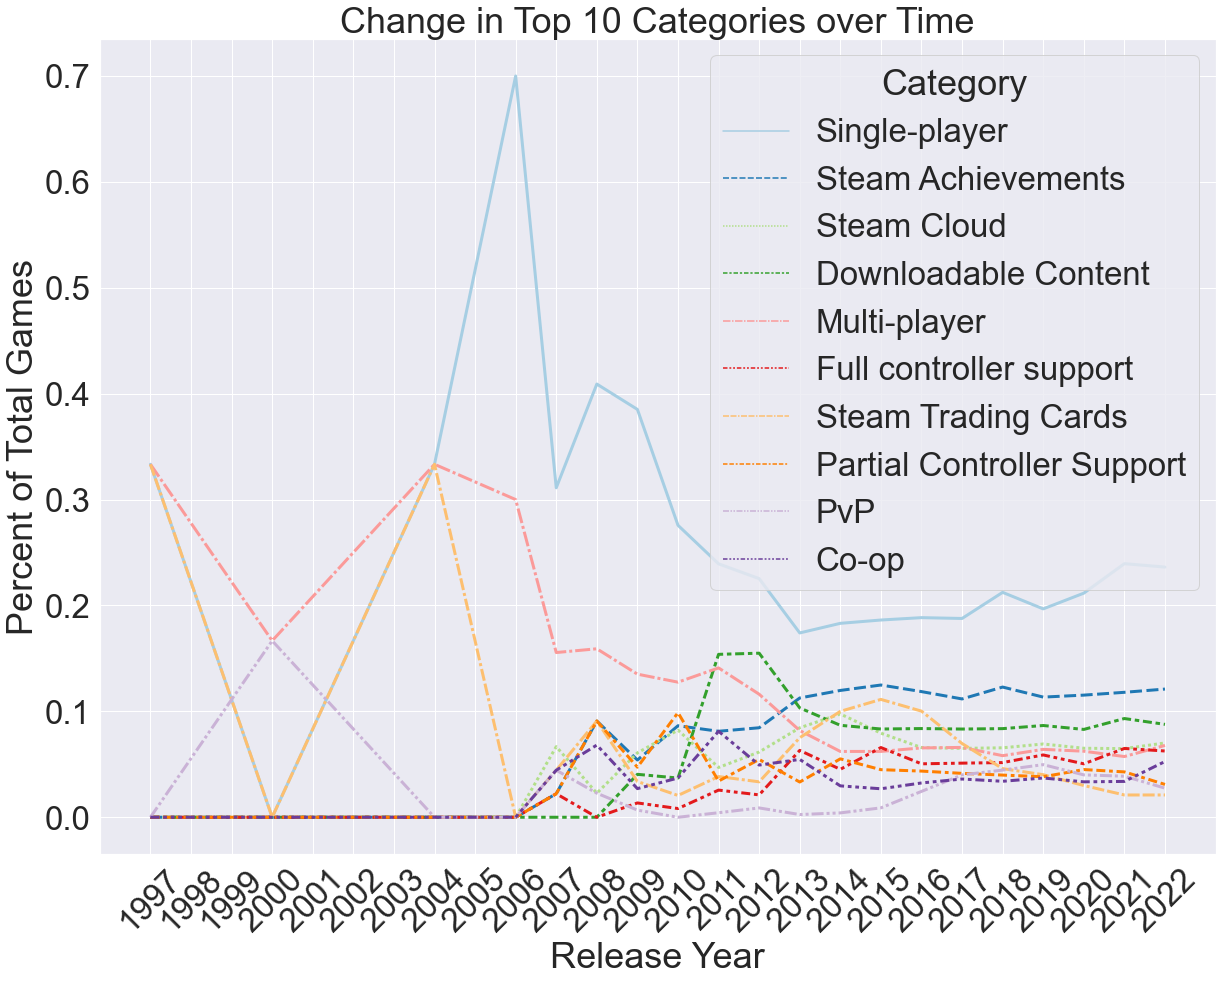

In [69]:
# plot
sns.set(rc = {'figure.figsize':(20,15)}, font_scale =3)
custom_palette = sns.color_palette("Paired", 10)
fig = sns.lineplot(data=YearGameXTab_Perc, x='Release Year', y='Percent of Total Games',style ='Category', hue='Category', linewidth = 3, palette = custom_palette).set(title='Change in Top 10 Categories over Time')
x = np.arange(1997,2023,1)
plt.xticks(ticks =x, labels = x, rotation = 45)
# show the graph

plt.savefig("Change in Categories over Time.png", bbox_inches="tight")
plt.show()

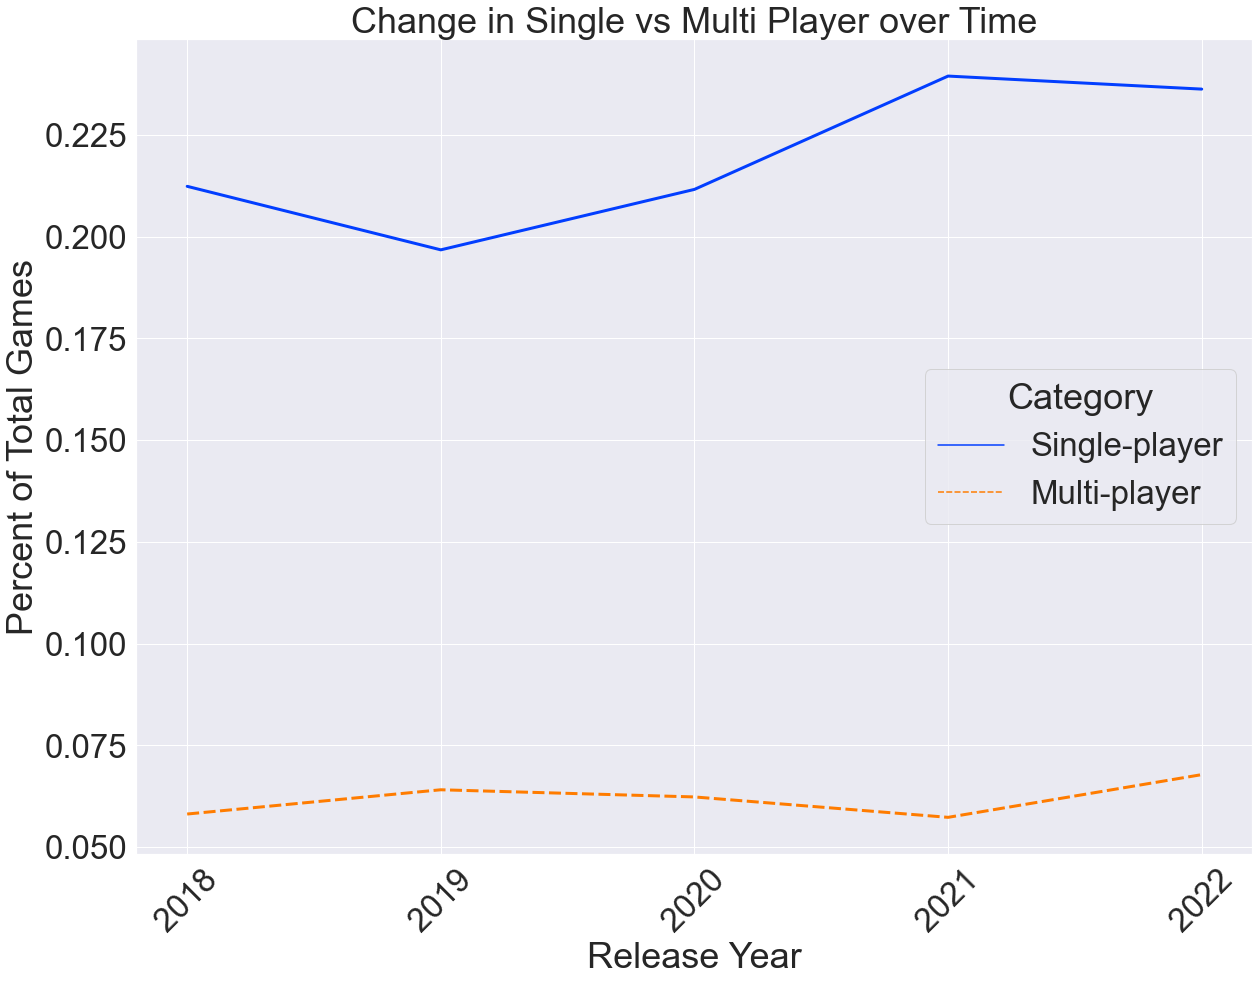

In [70]:
# plot
SinglevMulti = YearGameXTab_Perc[YearGameXTab_Perc['Category'].isin(['Single-player', 'Multi-player'])]

sns.set(rc = {'figure.figsize':(20,15)}, font_scale =3)
custom_palette = sns.color_palette("bright", 2)
fig = sns.lineplot(data=SinglevMulti[SinglevMulti['Release Year']>=2018], x='Release Year', y='Percent of Total Games',style ='Category', hue='Category', linewidth = 3, palette = custom_palette).set(title='Change in Single vs Multi Player over Time')
x = np.arange(2018,2023,1)
plt.xticks(ticks =x, labels = x, rotation = 45)
# show the graph
plt.savefig("Change in Multi-Player vs Single Player in Last4 Years.png", bbox_inches="tight")

plt.show()

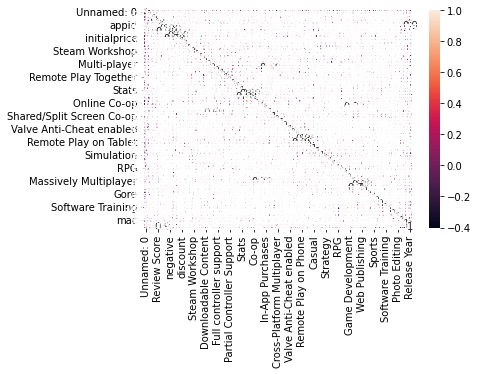

In [3]:
import seaborn as sns

import matplotlib.pyplot as plt

correlation_mat = GameData.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

In [4]:
GameData.columns

Index(['Unnamed: 0', 'type', 'name', 'required_age', 'is_free',
       'detailed_description', 'short_description', 'Review Score',
       'Review Score Description', 'Top Reviews by Upvotes', 'appid',
       'positive', 'negative', 'owners', 'price', 'initialprice', 'discount',
       'metacritic', 'Single-player', 'Steam Achievements', 'Steam Workshop',
       'Steam Cloud', 'Includes level editor', 'Downloadable Content',
       'Multi-player', 'Shared/Split Screen', 'Full controller support',
       'Steam Trading Cards', 'Remote Play Together',
       'Partial Controller Support', 'Steam Leaderboards',
       'Captions available', 'Stats', 'PvP', 'Online PvP', 'Co-op',
       'Online Co-op', 'MMO', 'In-App Purchases', 'Shared/Split Screen PvP',
       'Shared/Split Screen Co-op', 'Cross-Platform Multiplayer', 'LAN PvP',
       'LAN Co-op', 'Valve Anti-Cheat enabled', 'Remote Play on TV',
       'VR Support', 'Remote Play on Phone', 'Remote Play on Tablet', 'Action',
       'Casual

In [17]:
GameData = GameData[['type', 'name', 'required_age', 'is_free', 'Review Score',
       'Review Score Description', 
       'positive', 'negative', 'owners', 'price', 'initialprice', 'discount',
       'metacritic', 'Single-player', 'Steam Achievements', 
       'Steam Cloud', 'Downloadable Content',
       'Multi-player', 'Full controller support',
       'Steam Trading Cards', 
       'Partial Controller Support', 'PvP', 'Co-op','Indie', 'Action', 'Casual', 'Adventure', 'Simulation', 'Strategy','RPG', 'Early Access', 'Sports', 'Racing',
       'mac', 'linux', 'Release Date', 'detailed_description.1',
       'short_description.1', 'Top Reviews by Upvotes.1', 'tags.1',
       'Release Year']]

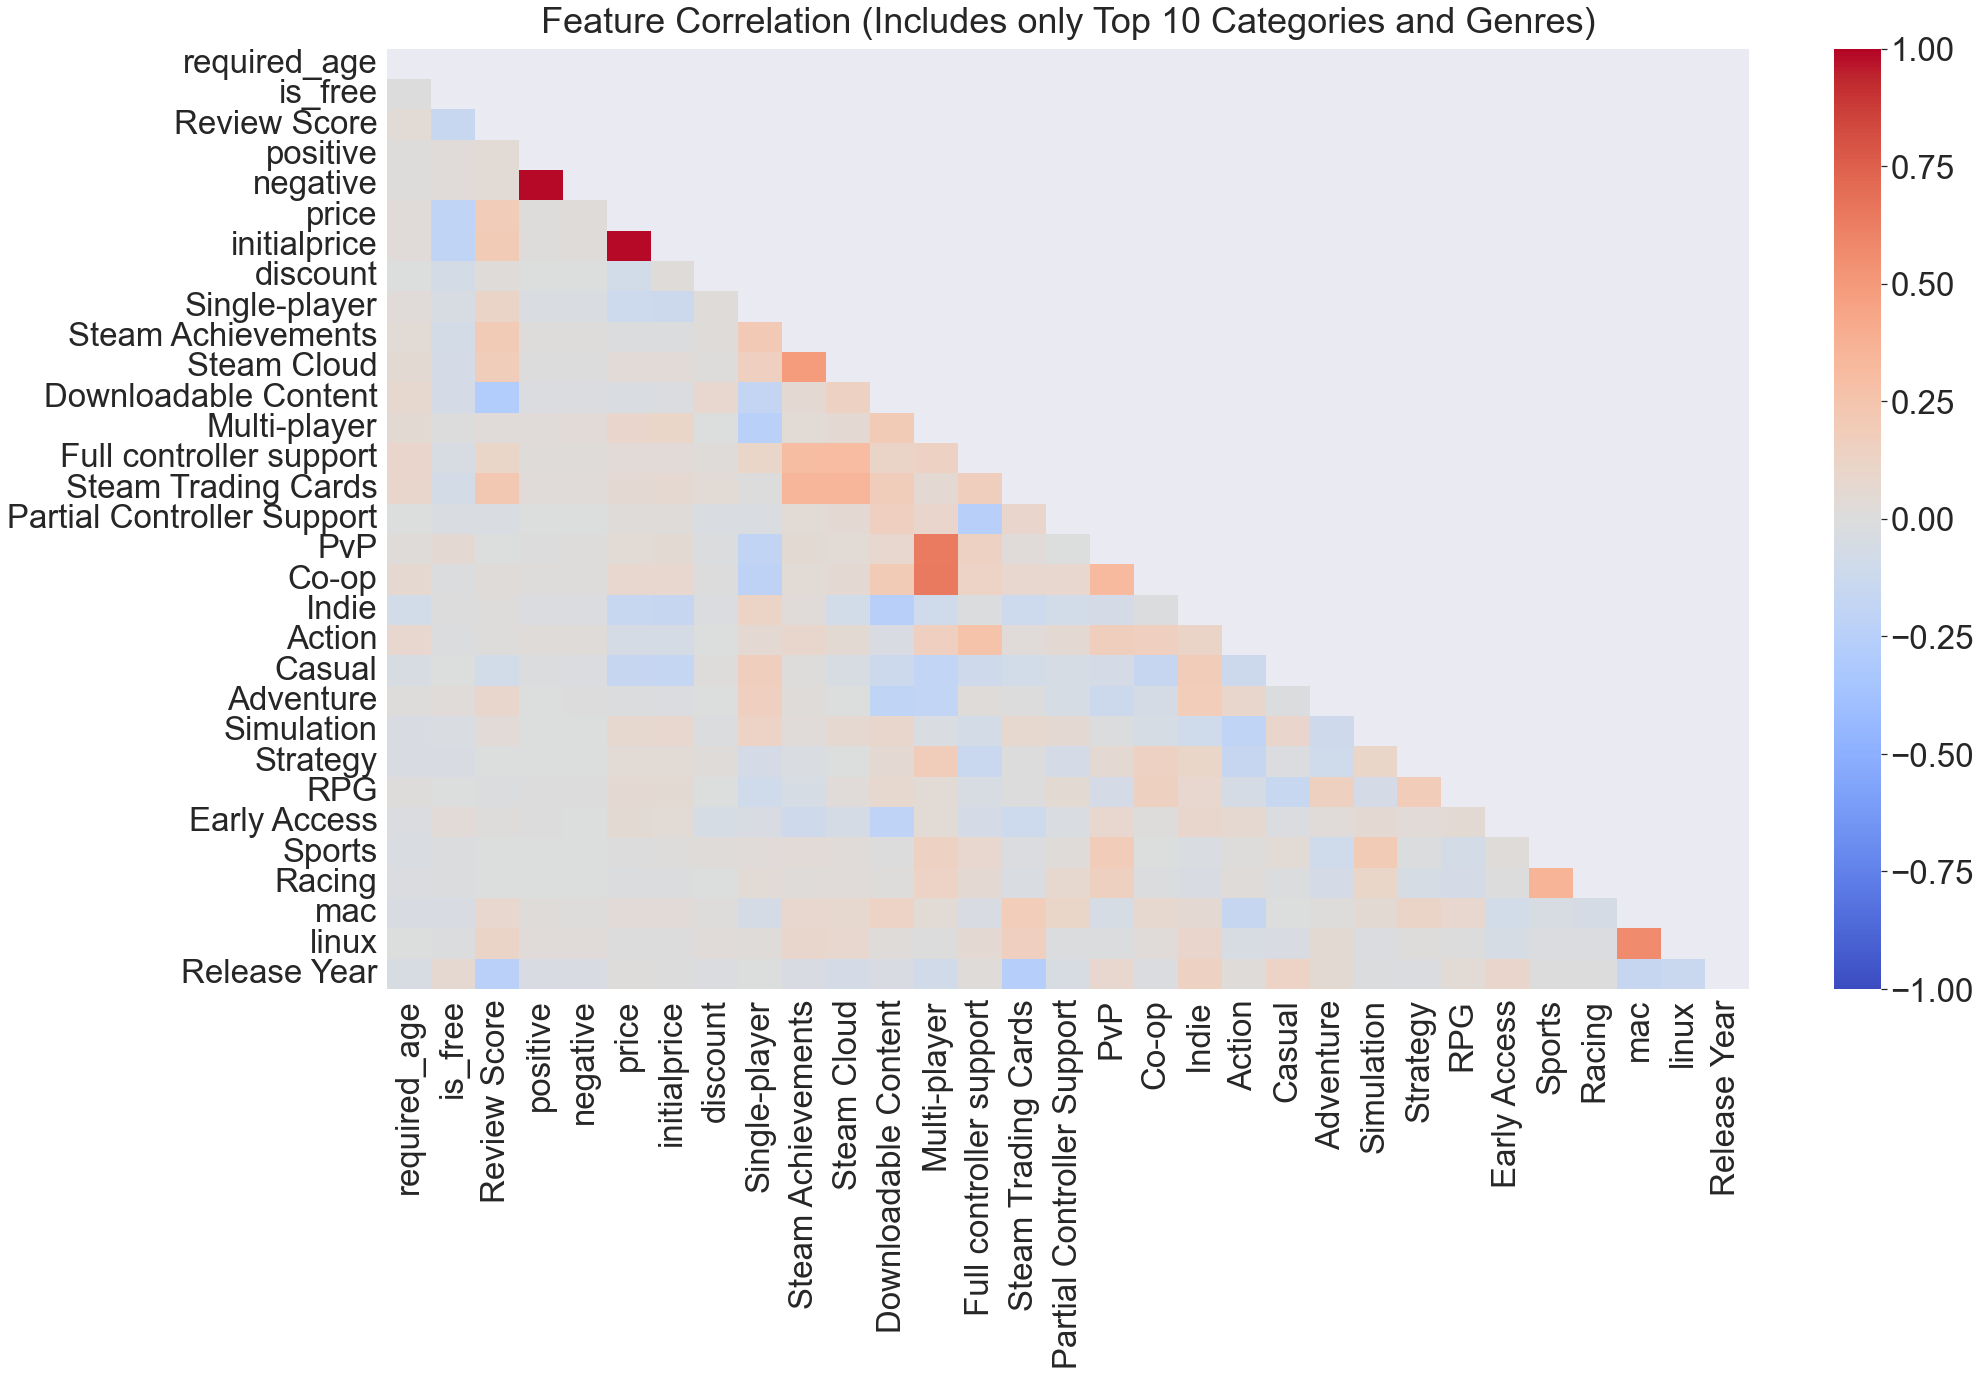

In [27]:
sns.set(rc = {'figure.figsize':(30,20)}, font_scale =3)
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(GameData.corr()))
heatmap = sns.heatmap(GameData.corr(), mask=mask, vmin=-1, vmax=1, annot=False, cmap='coolwarm')
heatmap.set_title('Feature Correlation (Includes only Top 10 Categories and Genres)', pad=16);
plt.tight_layout()
plt.savefig("Feature Correlation.png")